# Two way ANOVA

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# create a dataset
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'medium', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})
df.sample(10)

,water,sun,height
6,daily,medium,5
2,daily,low,6
16,weekly,low,4
7,daily,medium,6
21,weekly,medium,4
29,weekly,high,8
25,weekly,high,5
0,daily,low,6
17,weekly,low,4
14,daily,high,7


<Axes: xlabel='sun', ylabel='height'>

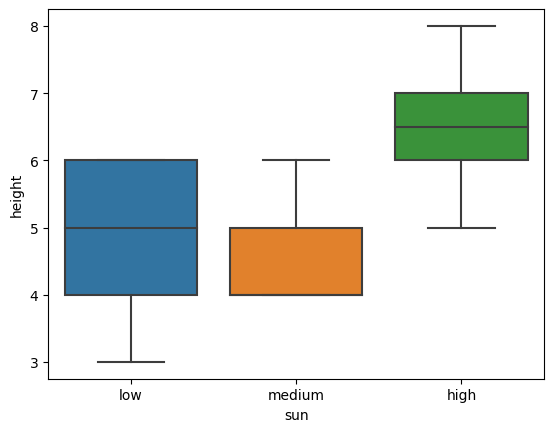

In [11]:
sns.boxplot(x=df['sun'], y=df['height'])

<Axes: xlabel='sun', ylabel='height'>

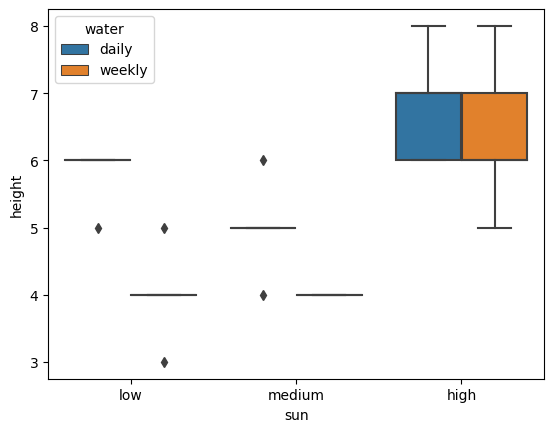

In [10]:
sns.boxplot(x=df['sun'], y=df['height'], hue=df['water'])

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# one way Anova
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [14]:
# Two way Anova
model = ols('height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [15]:
# another way of doing Two way anova
import pingouin as pg 
aov = pg.anova(data=df, dv = 'height', between=['sun','water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


# Tukey test in Two way Anova

In [16]:
from itertools import product
from statsmodels.stats.multicomp import MultiComparison
# Extract group means for Tukey's HSD
group_means = df.groupby(['sun', 'water'])['height'].mean().reset_index()

# Create a MultiComparison object
mc = MultiComparison(df['height'], groups=df[['sun', 'water']].apply(tuple, axis=1))

# Perform Tukey's HSD test
result = mc.tukeyhsd()

# Display the Tukey's HSD results
print(result)

c:\Users\Zeeshan Khalid\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:848: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.datali = [self.data[self.groups == k] for k in self.groupsunique]


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2        meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
  ('high', 'daily')   ('high', 'weekly')     -0.4  0.951 -1.8281  1.0281  False
  ('high', 'daily')     ('low', 'daily')     -1.0 0.2898 -2.4281  0.4281  False
  ('high', 'daily')    ('low', 'weekly')     -2.8    0.0 -4.2281 -1.3719   True
  ('high', 'daily')  ('medium', 'daily')     -1.8 0.0079 -3.2281 -0.3719   True
  ('high', 'daily') ('medium', 'weekly')     -2.8    0.0 -4.2281 -1.3719   True
 ('high', 'weekly')     ('low', 'daily')     -0.6 0.7827 -2.0281  0.8281  False
 ('high', 'weekly')    ('low', 'weekly')     -2.4 0.0003 -3.8281 -0.9719   True
 ('high', 'weekly')  ('medium', 'daily')     -1.4  0.057 -2.8281  0.0281  False
 ('high', 'weekly') ('medium', 'weekly')     -2.4 0.0003 -3.8281 -0.9719   True
   ('low', 'daily')    ('low', 'weekly')

# Lettering and Grouping in two way ANOVA- lettering is based on the groups' statistical significance
- We perform the Tukey's HSD test using pg.pairwise_tukey to get a DataFrame with the results.
- We create a new column called 'group' which combines the letters from the two compared groups.
- We group the DataFrame by the first group ('A') and concatenate the group letters using ','.join.
- The resulting group_lettering DataFrame will contain the groups and their corresponding lettering.

c:\Users\Zeeshan Khalid\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:848: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.datali = [self.data[self.groups == k] for k in self.groupsunique]


ValueError: setting an array element with a sequence

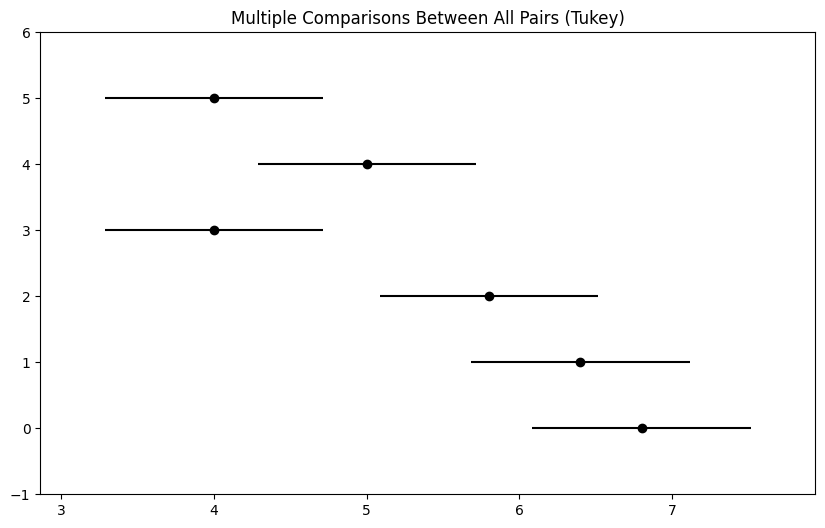

In [21]:
from itertools import product
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['height'], df[['sun', 'water']].apply(tuple, axis=1))

# Plot lettering and grouping
tukey_results.plot_simultaneous(xlabel='Height', ylabel='Groups')

# Show the plot
plt.show()


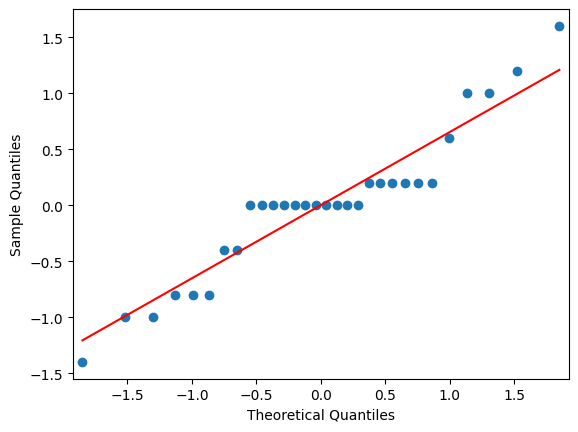

In [22]:
#qq plot
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()